## Coburg Coding Challenge - Nihal Rao

In [1]:
#!pip install arff
import pandas as pd 
import arff 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Project Aim
Train a champion model to predict the expected claim amount per customer per year i.e. ClaimAmount/Exposure based on the set of features available.

In [2]:
data_freq = arff.load('freMTPL2freq.arff') 
df_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower", "VehAge","DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"]) 
data_sev = arff.load('freMTPL2sev.arff') 
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])

In [3]:
df_freq.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
1,3.0,1.0,0.77,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
2,5.0,1.0,0.75,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22'
3,10.0,1.0,0.09,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
4,11.0,1.0,0.84,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'


In [4]:
df_sev.head()

,IDpol,ClaimAmount
0,1552.0,995.20
1,1010996.0,1128.12
2,4024277.0,1851.11
3,4007252.0,1204.00
4,4046424.0,1204.00


In [5]:
print(df_freq.shape, df_sev.shape)

(678013, 12) (26639, 2)


In [6]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  float64
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  float64
 5   VehAge      678013 non-null  float64
 6   DrivAge     678013 non-null  float64
 7   BonusMalus  678013 non-null  float64
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  float64
 11  Region      678013 non-null  object 
dtypes: float64(8), object(4)
memory usage: 62.1+ MB


In [7]:
df_sev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26639 entries, 0 to 26638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26639 non-null  float64
 1   ClaimAmount  26639 non-null  float64
dtypes: float64(2)
memory usage: 416.4 KB


In [8]:
df_freq.describe(include = 'all')

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
count,6.780130e+05,678013.000000,678013.000000,678013,678013.000000,678013.000000,678013.000000,678013.000000,678013,678013,678013.000000,678013
unique,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,11,2,NaN,22
top,NaN,NaN,NaN,'C',NaN,NaN,NaN,NaN,'B12',Regular,NaN,'R24'
freq,NaN,NaN,NaN,191880,NaN,NaN,NaN,NaN,166024,345877,NaN,160601
mean,2.621857e+06,0.053247,0.528750,NaN,6.454631,7.044265,45.499122,59.761502,NaN,NaN,1792.422405,NaN
std,1.641783e+06,0.240117,0.364442,NaN,2.050906,5.666232,14.137444,15.636658,NaN,NaN,3958.646564,NaN
min,1.000000e+00,0.000000,0.002732,NaN,4.000000,0.000000,18.000000,50.000000,NaN,NaN,1.000000,NaN
25%,1.157951e+06,0.000000,0.180000,NaN,5.000000,2.000000,34.000000,50.000000,NaN,NaN,92.000000,NaN
50%,2.272152e+06,0.000000,0.490000,NaN,6.000000,6.000000,44.000000,50.000000,NaN,NaN,393.000000,NaN
75%,4.046274e+06,0.000000,0.990000,NaN,7.000000,11.000000,55.000000,64.000000,NaN,NaN,1658.000000,NaN


In [9]:
df_sev.describe()

,IDpol,ClaimAmount
count,2.663900e+04,2.663900e+04
mean,2.279864e+06,2.278536e+03
std,1.577202e+06,2.929748e+04
min,1.390000e+02,1.000000e+00
25%,1.087642e+06,6.868100e+02
50%,2.137413e+06,1.172000e+03
75%,3.180162e+06,1.228080e+03
max,6.113971e+06,4.075401e+06


We see that the maximum claim amount is 4,000,000 and minimum is 1. This indicates that the severity table only contains claims which were paid out and not all claims in the frequency table.


In [10]:
df_freq['IDpol'].nunique()

678013

In [11]:
df_sev.shape[0] - df_sev['IDpol'].nunique()

1689

In [12]:
(df_sev['IDpol'].value_counts()>1).head()

IDpol
2262511.0    True
2282134.0    True
2227533.0    True
2220367.0    True
2277846.0    True
Name: count, dtype: bool

In [13]:
# Example of a person with multiple claims
df_sev[df_sev['IDpol'] == 2262511.0]

,IDpol,ClaimAmount
24857,2262511.0,2341.37
24858,2262511.0,1500.00
24863,2262511.0,135.97
24864,2262511.0,1500.00
24865,2262511.0,19461.00
...,...,...
25492,2262511.0,2408.18
25506,2262511.0,124.63
25508,2262511.0,2640.00
25526,2262511.0,382.70


Since there are insurers with multiple claims we group them together by their ID and consider the total claimed amount

In [14]:
# Now group by multiple claims for the same Id

df_sev = df_sev.groupby(['IDpol'])['ClaimAmount'].sum().reset_index()

In [15]:
df_sev[df_sev['IDpol'] == 2262511.0]

,IDpol,ClaimAmount
14512,2262511.0,151800.59


In [16]:
df_sev.shape

(24950, 2)

## Perform EDA with cleaning data to make it ready for usage in ML

In [17]:
# type conversion from float to int

df_freq['IDpol'] = df_freq['IDpol'].astype(int)
df_freq['ClaimNb'] = df_freq['ClaimNb'].astype(int)
df_sev['IDpol'] = df_sev['IDpol'].astype(int)


In [18]:
# lets check for duplicated entries
print(df_sev.duplicated().sum())
print(df_freq.duplicated().sum())

0
0


In [19]:
# check for missing values
print(df_freq.isna().sum().sum())
print(df_sev.isna().sum().sum())


0
0


We merge the two data frames on the column of ID 

In [20]:
# merge the data frames 

df = pd.merge(df_freq, df_sev, on='IDpol', how='outer')

In [21]:
df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1,1.0,0.10,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82',NaN
1,3,1.0,0.77,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82',NaN
2,5,1.0,0.75,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22',NaN
3,10,1.0,0.09,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72',NaN
4,11,1.0,0.84,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72',NaN


In [22]:
claim_perct = (df['ClaimNb'].value_counts(normalize = True)*100).sort_index()
print(claim_perct)

ClaimNb
0.0     94.976498
1.0      4.745927
2.0      0.263122
3.0      0.012094
4.0      0.001032
5.0      0.000295
6.0      0.000147
8.0      0.000147
9.0      0.000147
11.0     0.000442
16.0     0.000147
Name: proportion, dtype: float64


Index([0, 1, 2], dtype='int32', name='ClaimNb')


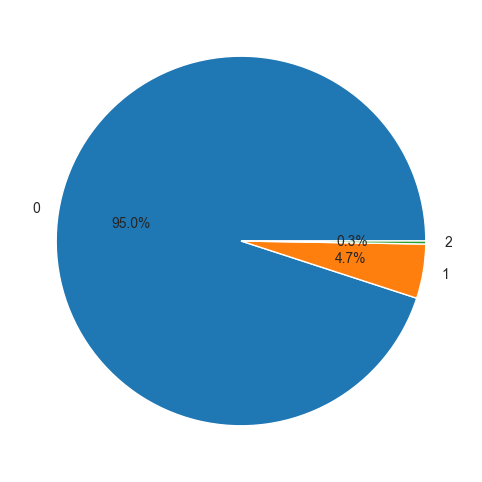

In [23]:
# Create a pie chart showing number of claims made
# top 3 claim percentages
top_3 = claim_perct.loc[:2]
labels = top_3.index.astype(int)
print(labels)
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
plt.pie(top_3, labels=labels, autopct='%1.1f%%')
plt.show()

In [24]:
df[df['ClaimAmount'].isna()]['ClaimNb'].value_counts(normalize = True)*100

ClaimNb
0.0     98.604129
1.0      1.318084
2.0      0.074265
3.0      0.003062
4.0      0.000306
11.0     0.000153
Name: proportion, dtype: float64

1. We see that most of Insurers who have made 0 claims don't have a claim amount associated to them so we assign 0
2. But for other insurers who have made 1 or more claims which is around $2\%$ since we don't have further information
and can't impute values we delete them 

In [25]:
df.loc[df['ClaimNb'] == 0, 'ClaimAmount'] = 0.0

In [26]:
df.dropna(inplace = True)

In [27]:
# ensure there are no Nans
df.isna().sum().sum()

0

In [28]:
# Cleaned data set
df.reset_index(inplace=True, drop = True)
df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,139,1.0,0.75,'F',7.0,1.0,61.0,50.0,'B12',Regular,27000.0,'R11',303.00
1,190,1.0,0.14,'B',12.0,5.0,50.0,60.0,'B12',Diesel,56.0,'R25',1981.84
2,414,1.0,0.14,'E',4.0,0.0,36.0,85.0,'B12',Regular,4792.0,'R11',1456.55
3,424,2.0,0.62,'F',10.0,0.0,51.0,100.0,'B12',Regular,27000.0,'R11',10834.00
4,463,1.0,0.31,'A',5.0,0.0,45.0,50.0,'B12',Regular,12.0,'R73',3986.67


## Note
The data frame has around 600,000 rows and the computation resources are not sufficient so I have downsized the data to let it run on my local computer

In [29]:
# down sizing data to only 20% 
df = df.sample(frac=0.2, random_state=0).copy()

In [30]:
df.shape

(133779, 13)

## Analyse relationships between variables and their interaction with ClaimAmount

In [31]:
# Collect people who have made at least 1 claim or more and claim Amount is reasonable
df1 = df[(df['ClaimNb'] > 0 ) & (df['ClaimAmount'] < 1000000.00)].copy()
df1.shape

(4950, 13)

In [32]:
df1.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
608532,5056592,1.0,0.54,'D',9.0,1.0,40.0,50.0,'B6',Diesel,645.0,'R94',602.00
234864,2091064,1.0,1.00,'E',5.0,6.0,28.0,80.0,'B11',Diesel,4348.0,'R72',913.96
154911,1145652,1.0,1.00,'C',6.0,3.0,51.0,50.0,'B1',Diesel,131.0,'R24',572.56
648016,6067146,1.0,0.43,'D',6.0,10.0,65.0,50.0,'B6',Regular,1955.0,'R94',660.00
220848,2066875,1.0,1.00,'D',4.0,15.0,49.0,50.0,'B1',Regular,1165.0,'R53',1172.00


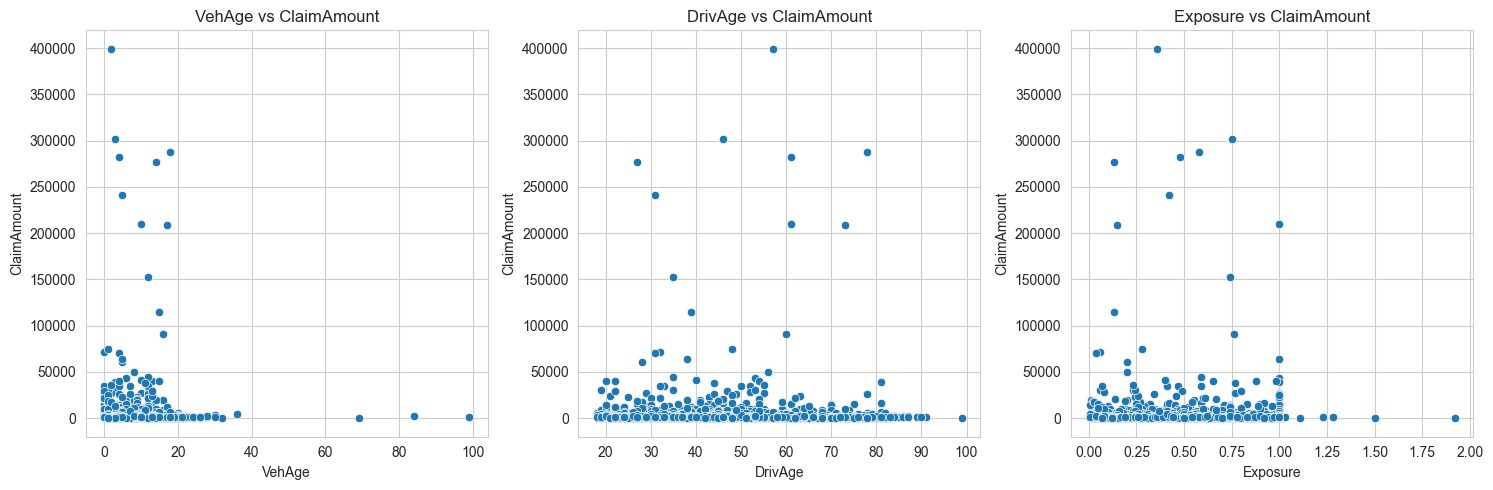

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for VehAge vs ClaimAmount
sns.scatterplot(data=df1, x='VehAge', y='ClaimAmount', ax=axes[0])
axes[0].set_title('VehAge vs ClaimAmount')

# Scatter plot for DrivAge vs ClaimAmount
sns.scatterplot(data=df1, x='DrivAge', y='ClaimAmount', ax=axes[1])
axes[1].set_title('DrivAge vs ClaimAmount')

# Scatter plot for Exposure vs ClaimAmount
sns.scatterplot(data=df1, x='Exposure', y='ClaimAmount', ax=axes[2])
axes[2].set_title('Exposure vs ClaimAmount')

plt.tight_layout()
plt.show()

Initial observations

1. Vehicle Age less than 20 years seem to make most of the claims with an outlier for 4,000,000 which can be looked into
2. Driver Age is spread across with most of them between the ages of 18 and 80 and there is no strong indicator for age
3. Most claims are made by people who have insurance for less than 1 year i..e. Exposure > 1.00



In [34]:
# Study some groupbys

gp1 = df1.groupby('ClaimNb')['ClaimAmount'].agg(['sum','mean'])
gp1

,sum,mean
ClaimNb,,
1.0,9673602.35,2056.463085
2.0,1245184.37,5253.942489
3.0,422265.90,70377.650000
4.0,4346.87,4346.870000
5.0,28672.00,28672.000000
6.0,9653.60,9653.600000


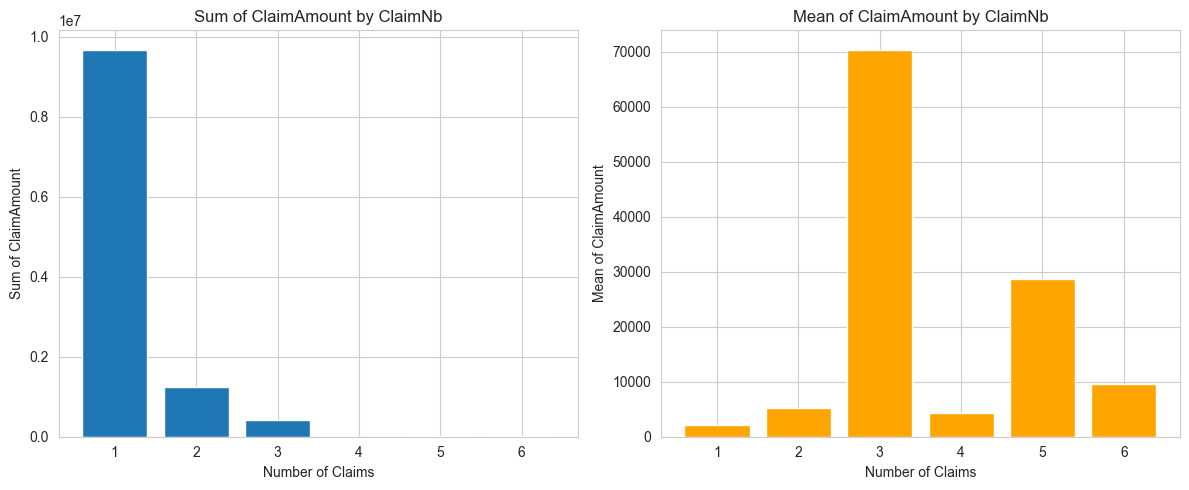

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot sum of ClaimAmount by ClaimNb
axes[0].bar(gp1.index, gp1['sum'])
axes[0].set_title('Sum of ClaimAmount by ClaimNb')
axes[0].set_xlabel('Number of Claims')
axes[0].set_ylabel('Sum of ClaimAmount')

# Plot mean of ClaimAmount by ClaimNb
axes[1].bar(gp1.index, gp1['mean'], color='orange')
axes[1].set_title('Mean of ClaimAmount by ClaimNb')
axes[1].set_xlabel('Number of Claims')
axes[1].set_ylabel('Mean of ClaimAmount')

plt.tight_layout()
plt.show()

Most of the Claims are made by people with 1 claim but on average except for the outlier with 16 claims we pay out the most for people with 8 claims or 11 claims and for people with 1 or 2 claims we pay out the least

In [36]:
gp2 = df.groupby('VehBrand')['ClaimAmount'].agg(['sum','mean'])
gp2

,sum,mean
VehBrand,,
'B1',2737627.97,85.059126
'B10',491758.98,138.640818
'B11',384670.06,141.683263
'B12',1545607.62,48.145271
'B13',152526.14,63.765109
'B14',27163.25,32.925152
'B2',6927501.56,219.259426
'B3',1198494.62,112.292197
'B4',1039646.40,205.463715


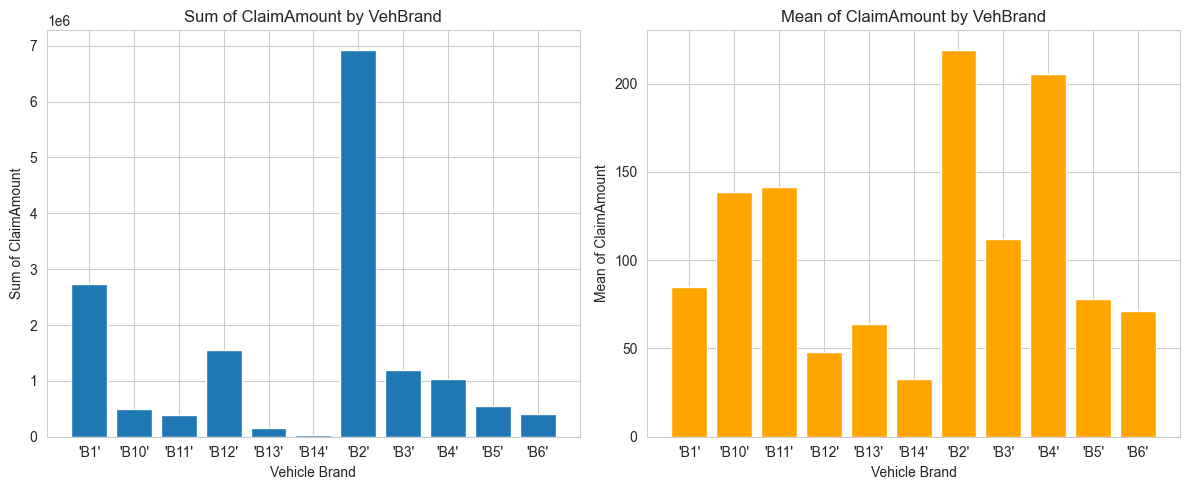

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot sum of ClaimAmount by ClaimNb
axes[0].bar(gp2.index, gp2['sum'])
axes[0].set_title('Sum of ClaimAmount by VehBrand')
axes[0].set_xlabel('Vehicle Brand')
axes[0].set_ylabel('Sum of ClaimAmount')

# Plot mean of ClaimAmount by ClaimNb
axes[1].bar(gp2.index, gp2['mean'], color='orange')
axes[1].set_title('Mean of ClaimAmount by VehBrand')
axes[1].set_xlabel('Vehicle Brand')
axes[1].set_ylabel('Mean of ClaimAmount')

plt.tight_layout()
plt.show()

Brand B2 and B1 car owners seems to make most of the claim and B11 seems to be a luxury car since on average we pay out the most to insure it. When comparing averages there seems to be a uniform distribution indicating there is no prior reason to weight one car over the others ... it there is no reason to added a weighted distribution for car brand premiums

In [38]:
gp3 = df1.groupby('VehGas')['ClaimAmount'].agg(['sum','mean'])
gp3

,sum,mean
VehGas,,
Diesel,6057419.55,2387.630883
Regular,5326305.54,2207.337563


In [39]:
gp4 = df1.groupby('Area')['ClaimAmount'].agg(['sum','mean'])
gp4

,sum,mean
Area,,
'A',1574713.79,2543.964120
'B',1223762.28,2497.474041
'C',2309666.77,1712.132520
'D',3204827.14,2582.455391
'E',2723771.84,2460.498500
'F',346983.27,2409.606042


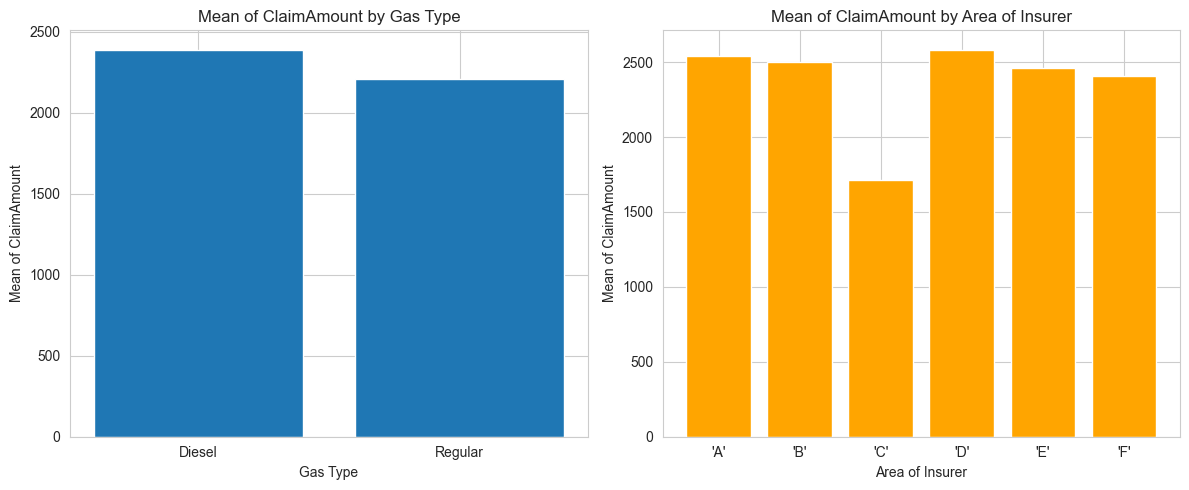

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot sum of ClaimAmount by ClaimNb
axes[0].bar(gp3.index, gp3['mean'])
axes[0].set_title('Mean of ClaimAmount by Gas Type')
axes[0].set_xlabel('Gas Type')
axes[0].set_ylabel('Mean of ClaimAmount')

# Plot mean of ClaimAmount by ClaimNb
axes[1].bar(gp4.index, gp4['mean'], color='orange')
axes[1].set_title('Mean of ClaimAmount by Area of Insurer')
axes[1].set_xlabel('Area of Insurer')
axes[1].set_ylabel('Mean of ClaimAmount')

plt.tight_layout()
plt.show()

We see that the mean amounts paid out for a regular or a Diesel car or where the insurer is from (Area) are almost uniform distributions hence there is no need to consider these features in building the model as they very weakly influence the Claim Amount

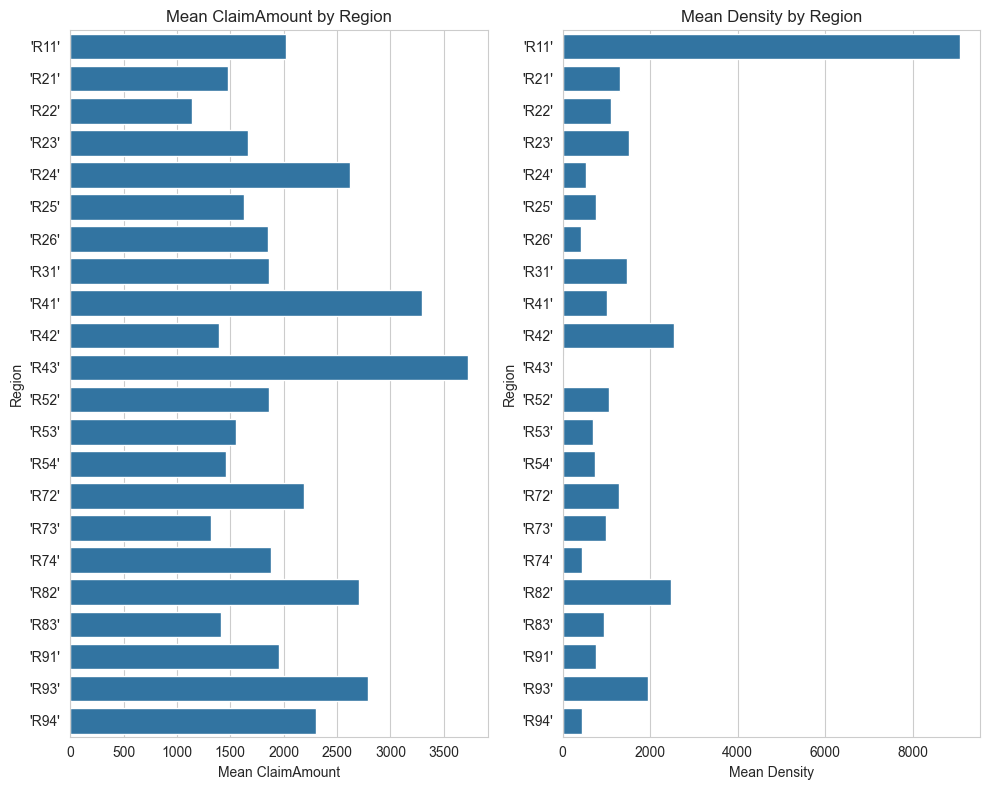

In [41]:
gp5 = df1.groupby('Region')[['ClaimAmount','Density']].mean()

fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# Plot the mean ClaimAmount
sns.barplot(data=gp5, x='ClaimAmount', y=gp5.index, ax=axes[0], orient='h')
axes[0].set_title('Mean ClaimAmount by Region')
axes[0].set_xlabel('Mean ClaimAmount')
axes[0].set_ylabel('Region')

# Plot the mean Density
sns.barplot(data=gp5, x='Density', y=gp5.index, ax=axes[1], orient='h')
axes[1].set_title('Mean Density by Region')
axes[1].set_xlabel('Mean Density')
axes[1].set_ylabel('Region')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

On average R21 seems to be making most of the claims followed by R94 which do not have a huge density implying either these areas have premium customers or have challenging driving conditions leading to more accidents and claims

In [42]:
# Feature Engineering 
# Create a new column to study the claims made in a year
df['ClaimYear'] = round(df['ClaimAmount']/df['Exposure'],2)

In [43]:
df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,ClaimYear
162450,1162512,0.0,1.00,'A',7.0,13.0,68.0,50.0,'B1',Regular,32.0,'R24',0.0,0.0
14157,50177,0.0,0.90,'B',11.0,2.0,42.0,50.0,'B1',Diesel,95.0,'R52',0.0,0.0
226325,2076327,0.0,1.00,'C',6.0,10.0,65.0,50.0,'B1',Regular,421.0,'R93',0.0,0.0
545240,4145532,0.0,1.00,'C',7.0,15.0,46.0,50.0,'B2',Diesel,124.0,'R52',0.0,0.0
414475,3135986,0.0,0.33,'A',5.0,4.0,33.0,50.0,'B2',Diesel,44.0,'R24',0.0,0.0


In [44]:
df.drop(['Exposure','ClaimAmount'], axis = 1, inplace=True)

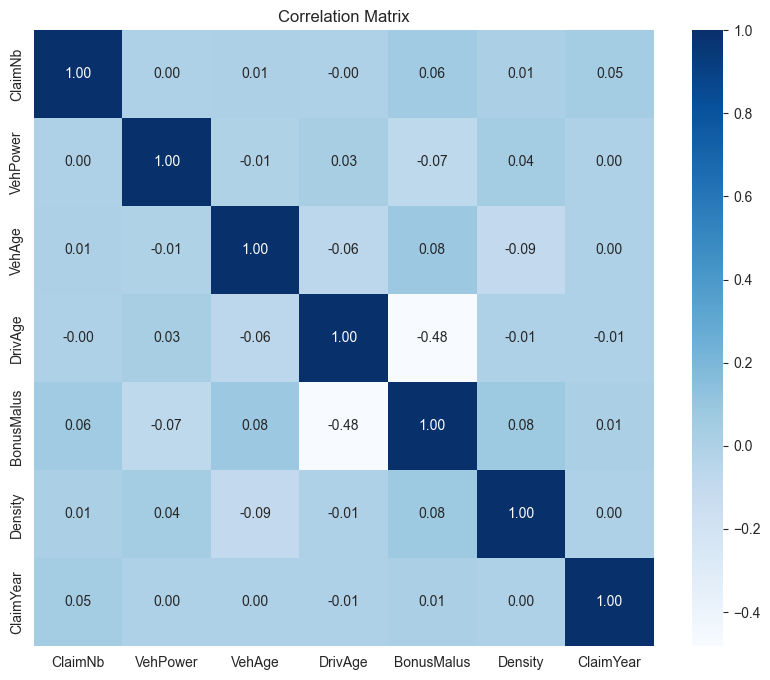

In [45]:
# Assuming df is your DataFrame
cm = df.drop('IDpol', axis = 1).select_dtypes(include=['number']).corr()

# Plot correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

1. Most of the features are almost independent to ClaimYear and very weakly effect it with almost 0's so the independent features are uncorrelated to the dependent feature
2. Driver Age and Bonus Malus are negatively correlated indicating older drivers have lower bonuses
3. ClaimNb seems to be slightly positively correlated with ClaimYear

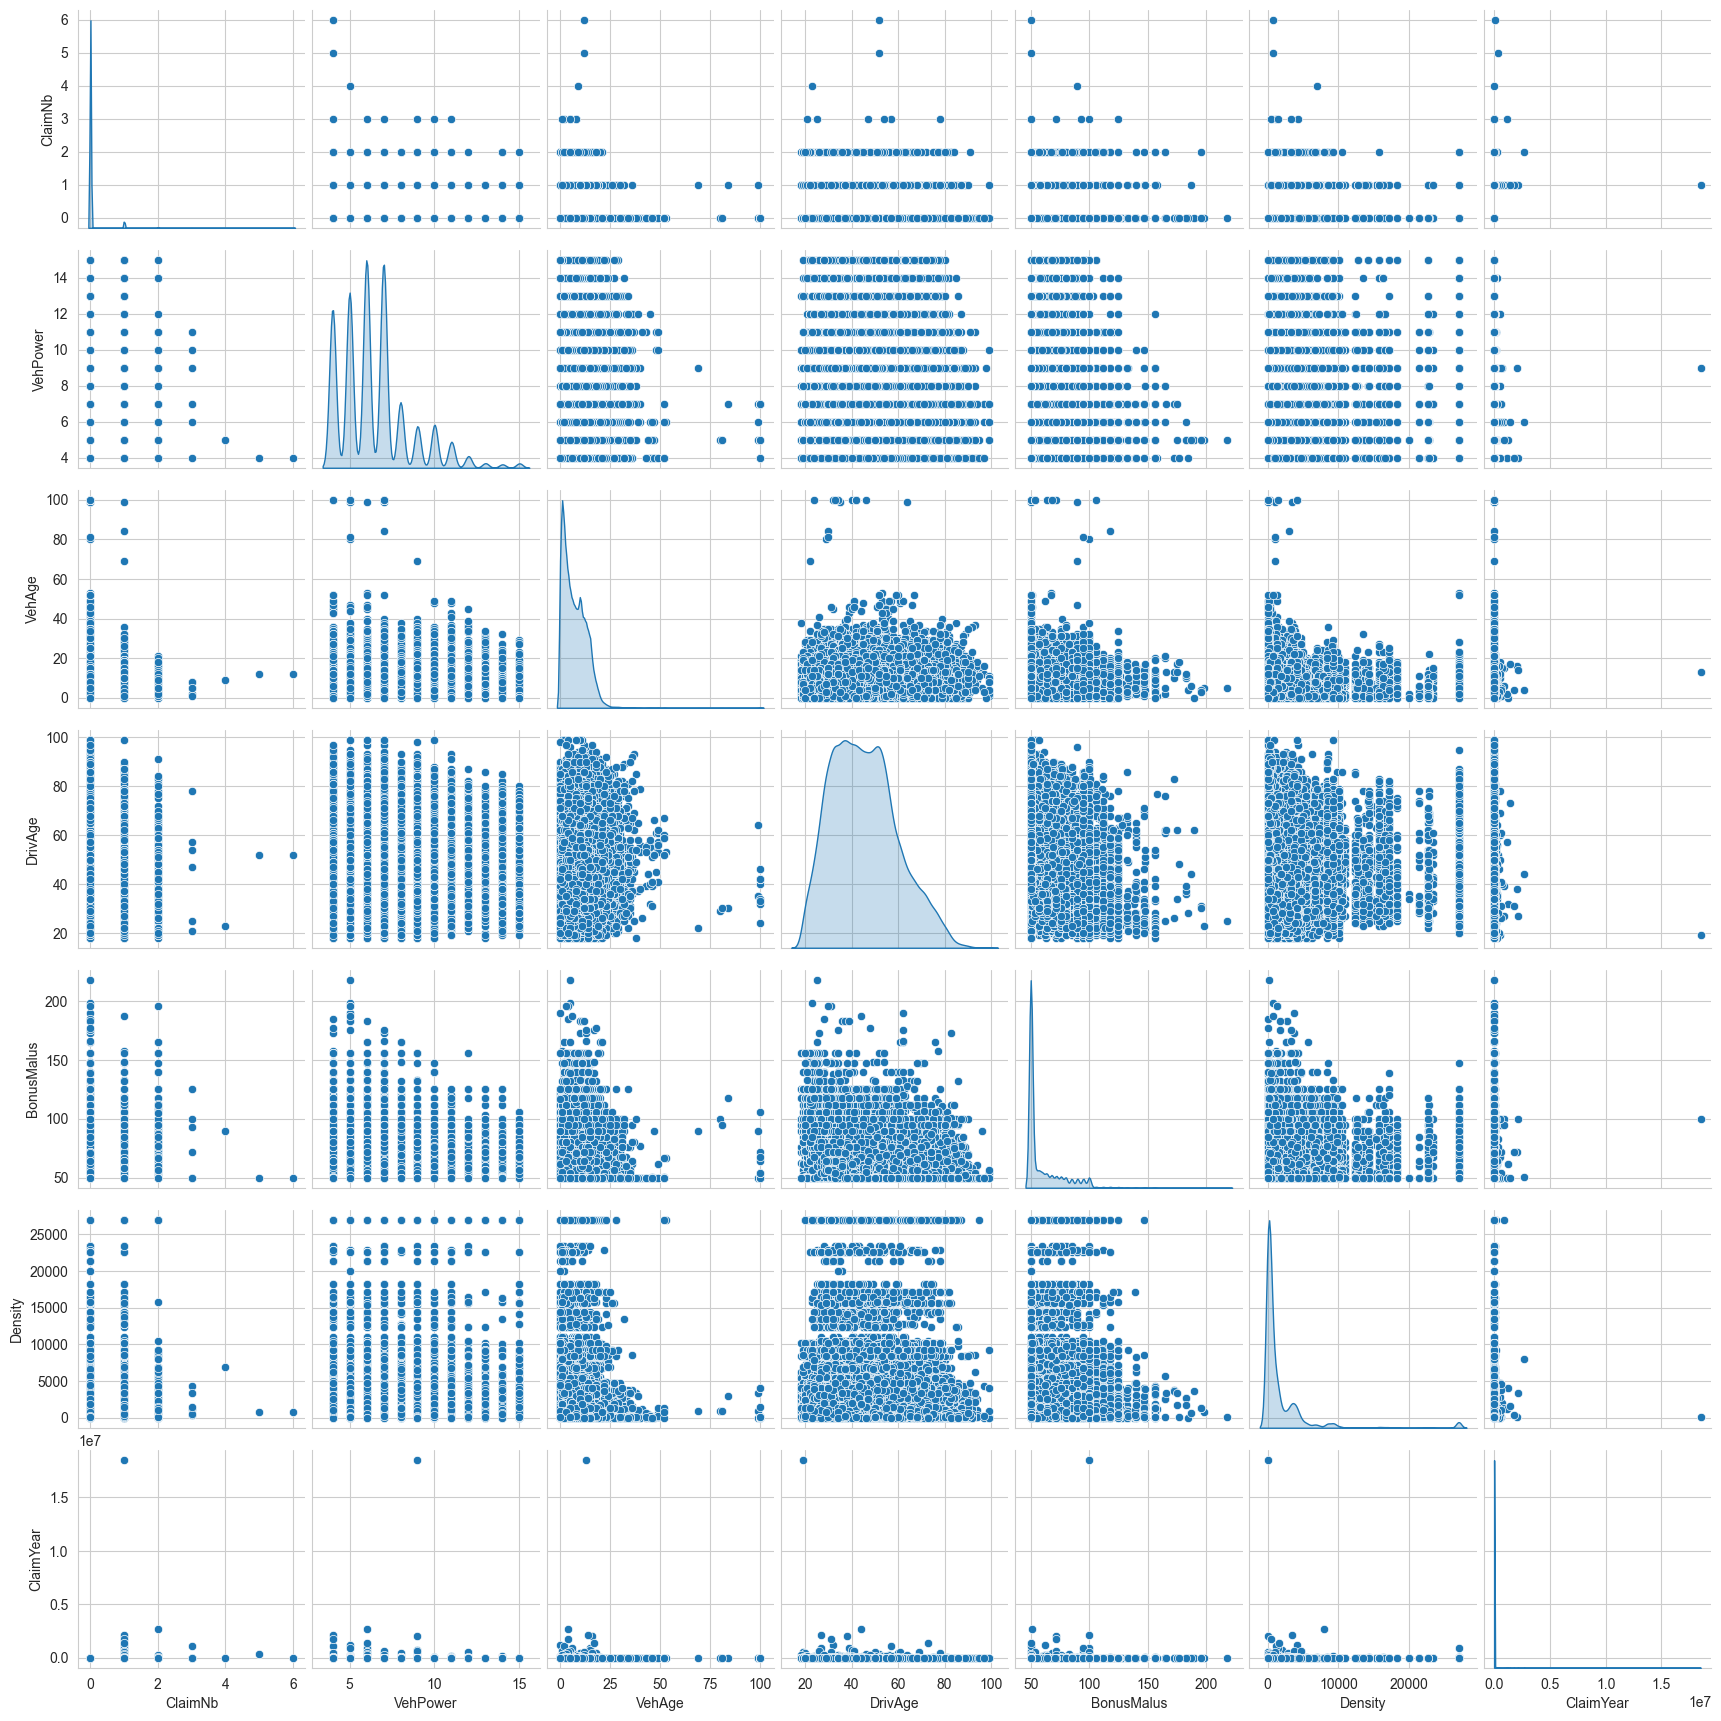

In [46]:
ndf = df.select_dtypes(include=['number'])
ndf.drop('IDpol', axis = 1, inplace = True)

ndf.head()

sns.pairplot(ndf, diag_kind='kde')
plt.show()


As expected there seems to be no strong correlation or observable trend in the claim per year and other variables.


# We choose 2 models - Random Forests and XG Boost

## Perfrom a Train - Test split to choose the best model

In [47]:
X = df.drop(['IDpol', 'ClaimYear'], axis = 1).copy()
y = df['ClaimYear'].copy()


In [48]:
X.head()

,ClaimNb,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
162450,0.0,'A',7.0,13.0,68.0,50.0,'B1',Regular,32.0,'R24'
14157,0.0,'B',11.0,2.0,42.0,50.0,'B1',Diesel,95.0,'R52'
226325,0.0,'C',6.0,10.0,65.0,50.0,'B1',Regular,421.0,'R93'
545240,0.0,'C',7.0,15.0,46.0,50.0,'B2',Diesel,124.0,'R52'
414475,0.0,'A',5.0,4.0,33.0,50.0,'B2',Diesel,44.0,'R24'


In [49]:
y[:5]

162450    0.0
14157     0.0
226325    0.0
545240    0.0
414475    0.0
Name: ClaimYear, dtype: float64

In [50]:
# One hot encode all categorical variables 
X_enc = pd.get_dummies(X, dtype = int)

X_enc.head()

,ClaimNb,VehPower,VehAge,DrivAge,BonusMalus,Density,Area_'A',Area_'B',Area_'C',Area_'D',...,Region_'R53',Region_'R54',Region_'R72',Region_'R73',Region_'R74',Region_'R82',Region_'R83',Region_'R91',Region_'R93',Region_'R94'
162450,0.0,7.0,13.0,68.0,50.0,32.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14157,0.0,11.0,2.0,42.0,50.0,95.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
226325,0.0,6.0,10.0,65.0,50.0,421.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
545240,0.0,7.0,15.0,46.0,50.0,124.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
414475,0.0,5.0,4.0,33.0,50.0,44.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Transform your data into categorical variables for machine learning

In [51]:
from sklearn.model_selection import train_test_split

# split of data into tr and test in a 80-20 split
X_tr, X_test, y_tr, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=42)
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)
# the overall spilt is in 60-20-20

In [52]:
print(round(X_train.shape[0]/X.shape[0]*100),round(X_val.shape[0]/X.shape[0]*100),round(X_test.shape[0]/X.shape[0]*100)) 

60 20 20


In [53]:
X_train.head()

,ClaimNb,VehPower,VehAge,DrivAge,BonusMalus,Density,Area_'A',Area_'B',Area_'C',Area_'D',...,Region_'R53',Region_'R54',Region_'R72',Region_'R73',Region_'R74',Region_'R82',Region_'R83',Region_'R91',Region_'R93',Region_'R94'
414317,0.0,10.0,6.0,57.0,53.0,1054.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
346378,0.0,11.0,15.0,59.0,50.0,3708.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
332067,0.0,5.0,1.0,29.0,57.0,1284.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
119613,0.0,4.0,1.0,59.0,55.0,161.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
260793,0.0,11.0,11.0,30.0,54.0,77.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
# Scale data before training the machine 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# fit and transform on the training data
X_train_s = scaler.fit_transform(X_train)

# transform the validation and test data
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

## Build Models


## Random Forests regression

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [ 2, 4]
}

# Instantiate GridSearchCV
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)



In [56]:
# Fit GridSearchCV to the data
rf_cv.fit(X_train_s, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 5], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [57]:
print(rf_cv.best_estimator_)

RandomForestRegressor(max_depth=1, min_samples_leaf=4, random_state=42)


In [58]:
print(rf_cv.best_score_)

-4436029599.596734


## XGBoost Model

In [59]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

param_grid = {
    'n_estimators': [20, 100,500],
    'max_depth': [2,  5],
    'learning_rate': [0.05, 0.2]
}

xgb_cv = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)



In [60]:
xgb_cv.fit(X_train_s, y_train)



GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.2], 'max_depth': [2, 5],
                         'n_estimators': [20, 100, 500]},
             scoring='neg_mean_squared_error')

In [61]:
print(xgb_cv.best_estimator_)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [62]:
print(xgb_cv.best_score_)


-4470290955.023447


## Evaluate the Models on validation to compare them

In [63]:
pred_rf = rf_cv.best_estimator_.predict(X_val_s)
pred_xgb = xgb_cv.best_estimator_.predict(X_val_s)

In [64]:
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error metric for each set of predicted y-values.

mae_rf = mean_absolute_error(y_val, pred_rf)
mae_xgb = mean_absolute_error(y_val, pred_xgb)


In [65]:
mae_scores = {'rf': mae_rf, 'xgb':mae_xgb}

print(mae_scores)

{'rf': 892.9642506882509, 'xgb': 971.5611762429054}


### RF seems to be the better model with a lower mae

## Find the best model prediction on the test set

In [66]:
pred_test = rf_cv.best_estimator_.predict(X_test_s)

mae_test = mean_absolute_error(y_test, pred_test)

In [67]:
print(mae_test)

686.5960807074154


In [68]:
# check feature importance in rf and xgb
rf_importances = pd.DataFrame(data=rf_cv.best_estimator_.feature_importances_, index=X_enc.columns, columns=['gini criterion'])

rf_importances = rf_importances.sort_values(by = 'gini criterion', ascending= False)

rf_importances[:5]

,gini criterion
ClaimNb,0.52
DrivAge,0.48
Region_'R43',0.00
Region_'R21',0.00
Region_'R22',0.00


<Axes: xlabel='gini criterion', ylabel='None'>

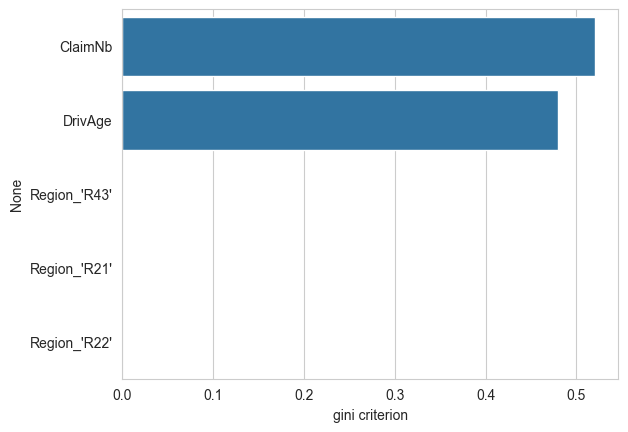

In [69]:
sns.barplot(data = rf_importances[:5], x = 'gini criterion', y = rf_importances.index[:5])

In [70]:
xgb_cv_importances = pd.DataFrame(xgb_cv.best_estimator_.feature_importances_, index=X_enc.columns, columns = ['gini criterion'])

xgb_cv_importances = xgb_cv_importances.sort_values(by='gini criterion', ascending=False)

xgb_cv_importances[:5]

,gini criterion
VehPower,0.685606
DrivAge,0.233562
ClaimNb,0.080832
Region_'R93',0.000000
Region_'R42',0.000000


<Axes: xlabel='gini criterion', ylabel='None'>

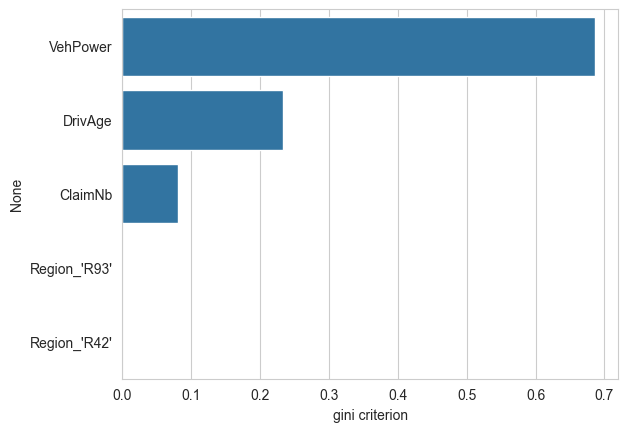

In [71]:
sns.barplot(data = xgb_cv_importances.head(), x = 'gini criterion', y = xgb_cv_importances.head().index)

## Conclusions

1. We see that RF performs slightly better than XGBoost on the downsized data set
2. The number of claims and driver age seems to be an important feature in both the models as shown by feature importance mapping
3. The performance on the test set is worse than the validation set indicating there is slight overfitting which might be corrected with regularization such as Lasso
4. XGBoost also shows Vehicle power to be an important feature but when checked with only numerical data as shown below it does not seem to be a consistent feature and might be an artifact of the data downsizing done

## Places for imporvement

1. With better computing resources the entire data set can be analyzed and the grid search can be more extensive
2. Other methods could also be tested such as multilinear regression or Poisson Regression
3. Since the feature dependence is very weak it might be beneficial to look into other features
4. Instead of summing all claims for multiple claims maybe the mean amount per claim can be analyzed
5. There was no information on the car brands or region or area and using one-hot encoding would not be recommended ... with domain expertise and historical data it would be better to create a ranking system based on these features and introduce weighted vectors
6. Regularization and feature selection could be implemented and the models could be tested against multiple data sets to see the performance

 ---- END ---


## Other Tests - not included
### Considering only numerical columns neglecting categorical data

In [72]:
X.head()

,ClaimNb,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
162450,0.0,'A',7.0,13.0,68.0,50.0,'B1',Regular,32.0,'R24'
14157,0.0,'B',11.0,2.0,42.0,50.0,'B1',Diesel,95.0,'R52'
226325,0.0,'C',6.0,10.0,65.0,50.0,'B1',Regular,421.0,'R93'
545240,0.0,'C',7.0,15.0,46.0,50.0,'B2',Diesel,124.0,'R52'
414475,0.0,'A',5.0,4.0,33.0,50.0,'B2',Diesel,44.0,'R24'


In [73]:
X_num = X.drop(['Area','VehBrand','VehGas','Region'], axis = 1).copy()

In [74]:
X_num.head()

,ClaimNb,VehPower,VehAge,DrivAge,BonusMalus,Density
162450,0.0,7.0,13.0,68.0,50.0,32.0
14157,0.0,11.0,2.0,42.0,50.0,95.0
226325,0.0,6.0,10.0,65.0,50.0,421.0
545240,0.0,7.0,15.0,46.0,50.0,124.0
414475,0.0,5.0,4.0,33.0,50.0,44.0


In [75]:
y.head()

162450    0.0
14157     0.0
226325    0.0
545240    0.0
414475    0.0
Name: ClaimYear, dtype: float64

In [76]:
# split of data into tr and test in a 80-20 split
X_tr, X_test, y_tr, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)
# the overall spilt is in 60-20-20

In [77]:
scaler = StandardScaler()
# fit and transform on the training data
X_train_s = scaler.fit_transform(X_train)

# transform the validation and test data
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

In [78]:
xgb = XGBRegressor()

param_grid = {
    'n_estimators': [20, 100,500],
    'max_depth': [None, 2,  5],
    'learning_rate': [0.05, 0.2, 1.0]
}

xgb_cv = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


In [79]:
xgb_cv.fit(X_train_s, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.2, 1.0],
                         'max_depth': [None, 2, 5],
                         'n_estimators': [20, 100, 500]},
             scoring='neg_mean_squared_error')

In [80]:
print(xgb_cv.best_score_)
print(xgb_cv.best_estimator_)

-4473395586.2538185
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [81]:
pred_test = xgb_cv.best_estimator_.predict(X_test_s)

mae_test = mean_absolute_error(y_test, pred_test)
print(mae_test)

686.8725993050842


In [82]:
xgb_cv_importances = pd.DataFrame(xgb_cv.best_estimator_.feature_importances_, index=X_num.columns, columns = ['gini criterion'])

xgb_cv_importances = xgb_cv_importances.sort_values(by='gini criterion', ascending=False)

xgb_cv_importances[:5]

,gini criterion
VehPower,0.685606
DrivAge,0.233562
ClaimNb,0.080832
VehAge,0.000000
BonusMalus,0.000000
